## Chapter 3: Building a Deep Neural Network with Pytorch
- In a neural network, there are various hyperparameters such as __batch size__, __learning rate__ and __loss optimizer__
- lets perform image classification using neural networks.  
- we will learn how to represent images and tweak the hyperparameters of a neural network to understand their impact
- __parameters__ are learned during training, __hyper parameters__ are inputs provided by the investigator who is building a neural network
- Tweaking hyperparameters will affect both the accuracy and speed of training a NN.  Scaling, batch normalization and regularization help in improving performance of a NN.  
- We will use the FashionMNIST dataset.
__hyper parameters__ can help us avoid overfitting

## Representing an Image
- image usually in jpeg and png is comprised of array of pixes.  
- A pixel is the smallest constituting element of an image.  
- In grayscale image, each pixel is a scalar value between 0 and 255, 0 is black and 255 is white and anything in between is grey.  
- smaller the pixel value, darker it is
- pixels in color images are 3 dimensional vectors that correspond to scalar values that can be found in red, green and blue color channels
- an image has height x width x c pixels, where height is number of rows of pixels, width is number of columns of pixels, and c is the number of color channels
- c is 3 for color images (one channel each for red, green adn blue intensities of of the image.  1 is for greyscale images)

## Converting images into structured arrays and scalars


In [1]:
!!wget https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg

['--2024-03-14 23:37:23--  https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg',
 'Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18',
 'Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.',
 'HTTP request sent, awaiting response... 302 Found',
 'Location: /s/raw/l98leemr7r5stnm/Hemanvi.jpeg [following]',
 '--2024-03-14 23:37:23--  https://www.dropbox.com/s/raw/l98leemr7r5stnm/Hemanvi.jpeg',
 'Reusing existing connection to www.dropbox.com:443.',
 'HTTP request sent, awaiting response... 302 Found',
 'Location: https://ucab4f329511195ae522a7241260.dl.dropboxusercontent.com/cd/0/inline/CPFU1zqE1j2_3ZXTbfxbFGUGVh2zbuni8ww0YYkwIWe2QSnkjqnoTZ1T8rAK0b3MPAfzSQmcdqp8WVYc6OrGgDzJw8zheReRsxcQLhacJSqt-c0mtQgvhe5KzqNUPiJLAJvA_h7HfC0dQ1Y8cN5YUM1D/file# [following]',
 '--2024-03-14 23:37:24--  https://ucab4f329511195ae522a7241260.dl.dropboxusercontent.com/cd/0/inline/CPFU1zqE1j2_3ZXTbfxbFGUGVh2zbuni8ww0YYkwIWe2QSnkjqnoTZ1T8rAK0b3MPAfzSQmcdqp8WVYc6OrGgDzJw8zh

In [2]:
import cv2
import matplotlib.pyplot as plt 
import os
path = os.path.join(os.getcwd(), 'cv_with_pytorch', 'figures', 'Hemanvi.jpeg')
img = cv2.imread(path)


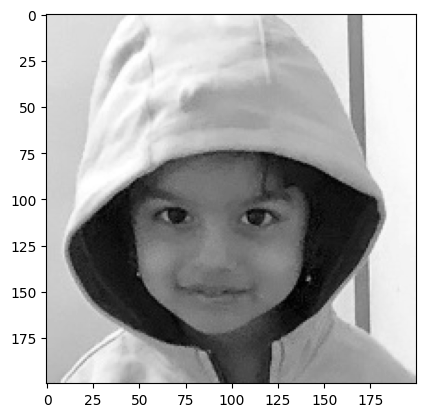

In [3]:
# crop the image between 50th and 250 rows and 40 and 250 columns
img1 = img[50:250, 40:240]
# convert to greyscale
img_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

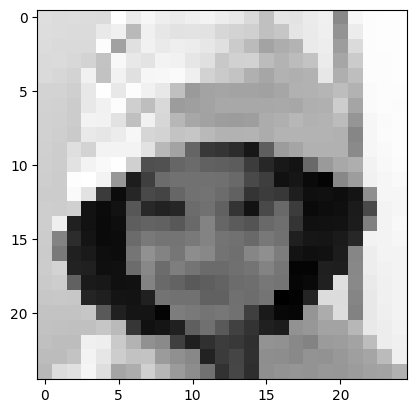

In [4]:
# convert image into 25x25 array and plot it
img_gray_small = cv2.resize(img_gray, (25, 25))
plt.imshow(img_gray_small, cmap='gray')

- having few pixels to represent the same image results in blurrier output
- brigest red pixel is denoed as (255, 0, 0)
- white pixel in 3d vector image is (255, 255, 255)
- lets creat an array of pixel values for colored images

In [5]:
img2 = img[50:250, 40:240, :]
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

- Note that we reordered the channels using cv2.cvtcolor method because when you import using cv2, channels are ordered as BGR; 
- We are used to looking ta images in RGB channels

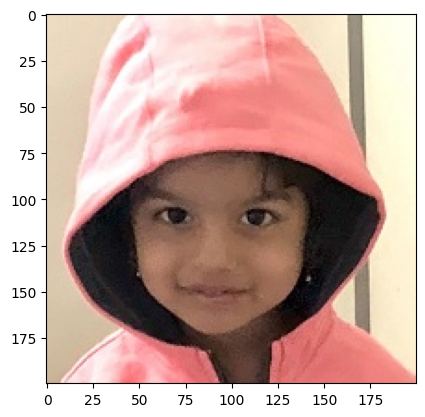

In [6]:
plt.imshow(img2)

In [7]:
crop = img2[-3:, -3:] # bottom right 3x3 array of pixels is obtained this way

In [8]:
print(crop)

[[[242 149 141]
  [249 161 151]
  [239 161 148]]

 [[239 145 135]
  [244 150 140]
  [247 159 149]]

 [[239 145 135]
  [242 148 138]
  [245 153 142]]]


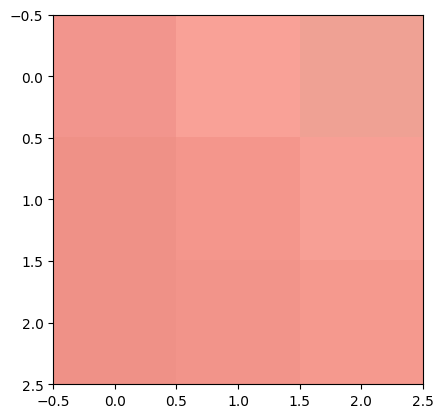

In [9]:
plt.imshow(crop)

In [10]:
crop

array([[[242, 149, 141],
        [249, 161, 151],
        [239, 161, 148]],

       [[239, 145, 135],
        [244, 150, 140],
        [247, 159, 149]],

       [[239, 145, 135],
        [242, 148, 138],
        [245, 153, 142]]], dtype=uint8)

 - Notice its a 3x3x3 for the color image.  3 color channels where each channel has 3 rows and 3 columns
 - Notice that for gray scale image, its just one color channel as shown below

In [11]:
img_gray_small.shape

(25, 25)

## Preparing Data for Image Classification
- we will use the Fashion MNIST dataset

In [12]:
from torchvision import datasets 
import torch
import numpy as np
path = os.path.join(os.getcwd(), 'cv_with_pytorch', 'datasets')
fmnist = datasets.FashionMNIST(path, download=True, train=True)

In [13]:
tr_images = fmnist.data
tr_targets = fmnist.targets
unique_values = tr_targets.unique()
fmnist.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [14]:
unique_values

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
tr_images.shape, tr_targets.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [16]:
tr_images[0].shape

torch.Size([28, 28])

- there are 60k images each of 28x28 in size and with 10 possible classes across all the images.

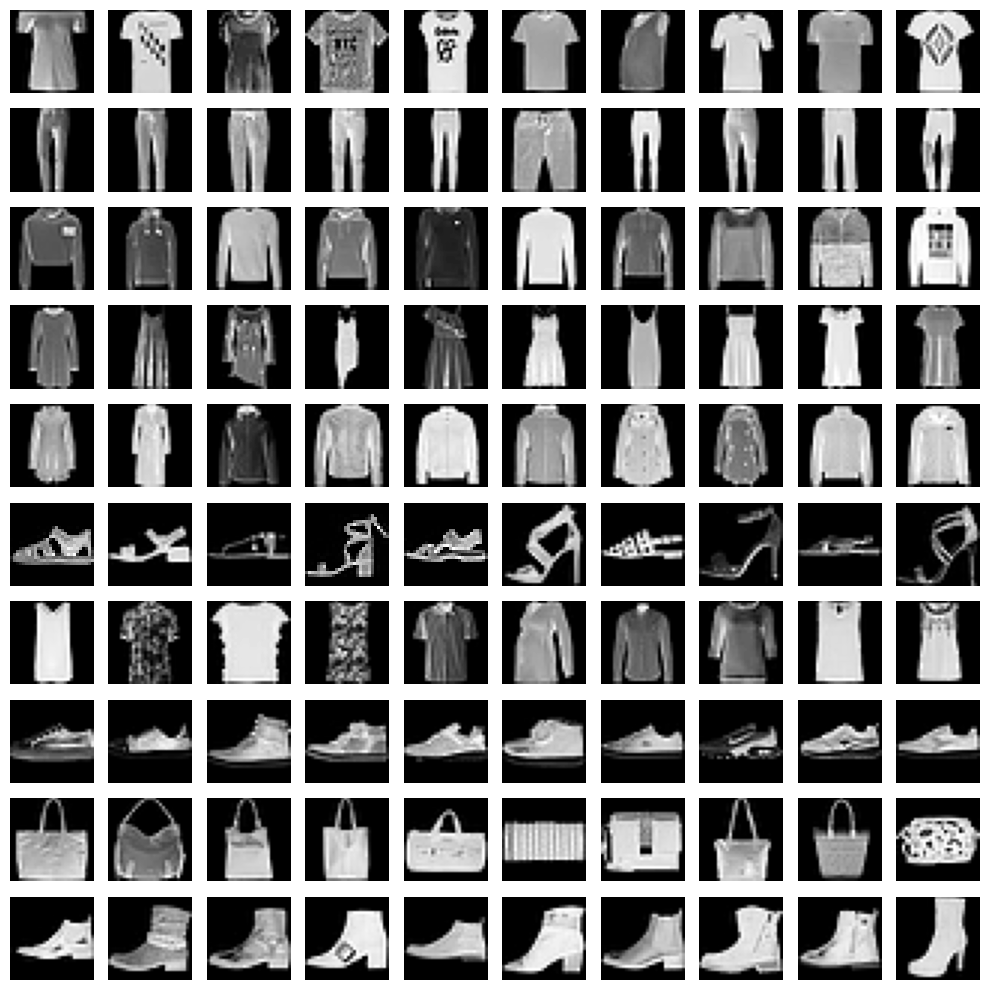

In [17]:
R, C = len(tr_targets.unique()), 10
fig, ax = plt.subplots(R, C, figsize=(10, 10))
for label, plot_row in enumerate(ax):
    label_x_rows = np.where(tr_targets == label)[0]
    for plot_cell in plot_row:
        plot_cell.grid(False);
        plot_cell.axis('off');
        ix = np.random.choice(label_x_rows)
        x, y = tr_images[ix], tr_targets[ix]
        plot_cell.imshow(x, cmap='gray')
plt.tight_layout()


## Training a Neural Network


In [37]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn 

class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.view(-1, 28*28)
        self.x, self.y = x.float(), y.float()
    def __getitem__(self, ix):
        return self.x[ix].to('mps'), self.y[ix].to("mps")
    
    def __len__(self):
        return len(self.x)


def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    return trn_dl

        

In [38]:
trn_dl = get_data()

In [44]:
learning_rate = 1e-2
def get_model(learning_rate):
    model = nn.Sequential(
        nn.Linear(28*28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to("mps")
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    return model, loss_fn, optimizer

def train_model(x, y, model, opt, loss_fn):
    model.train()
    pred = model(x)
    batch_loss = loss_fn(pred, y)
    # based on forward pass in model(x).  It computes the gradients of the loss wrt to all the parameters in the model
    batch_loss.backward()
    opt.step()
    opt.zero_grad()
    return batch_loss.item()

@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    pred = model(x)
    max_values, arg_max = pred.max(-1)
    is_correct = arg_max == y
    return is_correct.cpu().numpy().tolist()

- preceding code passes the batch of images through the model in the forward pass.  Computes loss on the batch and passes the weights through backward propagation and updates them.  It flushes the memory of the gradient so that it doesn't influence how the gradient is calculated in the next pass
- note the @torch.no_grad() decorator.  tells us that we dont need to calculate teh gradient

In [45]:
# train NN
trn_dl = get_data()
model, loss_fn, optimizer = get_model(learning_rate=learning_rate)



In [46]:
# iterate
losses, accuracies = [], []
for epoch in range(5):
    print(epoch)
    epoch_losses, epoch_accuracies = [], []
    for x_batch, y_batch in trn_dl:
        loss = train_model(x_batch, y_batch, model, optimizer, loss_fn)
        epoch_losses.append(loss)
    epoch_loss = np.array(epoch_losses).mean()

    # calculate the accuracy at end of training all batches
    for x_batch, y_batch in trn_dl:
        is_correct = accuracy(x_batch, y_batch, model)
        epoch_accuracies.extend(is_correct)
    epoch_accuracy = np.mean(epoch_accuracies)
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)


0
1
2
3
4


In [ ]:
# iterate
losses, accuracies = [], []
for epoch in range(5):
    print(epoch)
    epoch_losses, epoch_accuracies = [], []
    for x_batch, y_batch in trn_dl:
        loss = train_model(x_batch, y_batch, model, optimizer, loss_fn)
        epoch_losses.append(loss)
        is_correct = accuracy(x_batch, y_batch, model)
        epoch_accuracies.extend(is_correct)
    epoch_loss = np.array(epoch_losses).mean()
    losses.append(epoch_loss)
    epoch_accuracy = np.mean(epoch_accuracies)
    accuracies.append(epoch_accuracy)


In [47]:
accuracies

[0.1454,
 0.15415,
 0.13291666666666666,
 0.17521666666666666,
 0.12863333333333332]

/var/folders/8q/h_918phj53q6hkl0scwf5fmr0000gn/T/ipykernel_8105/2598686676.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


[Text(0, 0.12, '12%'),
 Text(0, 0.13, '13%'),
 Text(0, 0.13999999999999999, '14%'),
 Text(0, 0.15, '15%'),
 Text(0, 0.16, '16%'),
 Text(0, 0.16999999999999998, '17%'),
 Text(0, 0.18, '18%')]

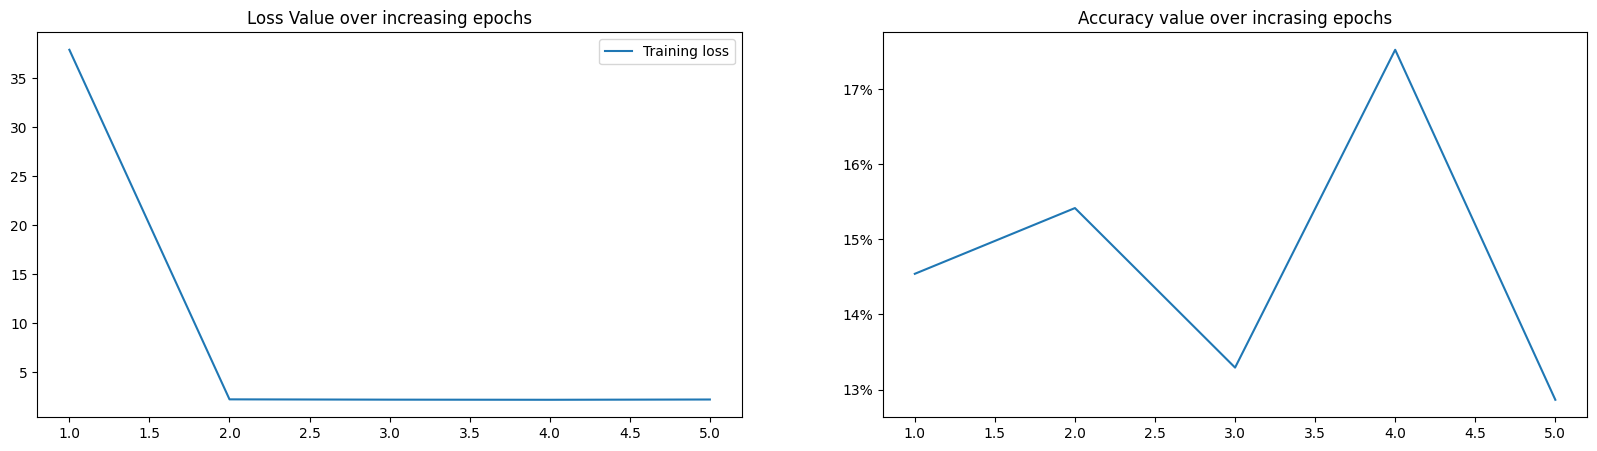

In [48]:
epochs = np.arange(5) + 1
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.title("Loss Value over increasing epochs")
plt.plot(epochs, losses, label='Training loss')
plt.legend()
plt.subplot(122)
plt.title("Accuracy value over incrasing epochs")
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])

- training accuracy is close to 12% while training loss did not decline any further.  This indicates that no matter how long we let our model run, it is unlikely that the model is going to provide high accuracy.  So this means that we need to look at various hyperparameters to see how we can improve this model

## Scaling dataset to improve model accuracy
- scale it by dividing it by 255.  This will improve model accuracy as during gradient descent, it will ensure the update of the weights are similar rather than dependent on the values of the pixels

In [59]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/255.
        x = x.view(-1, 28*28)
        self.x, self.y = x.float(), y.float()
    def __getitem__(self, ix):
        return self.x[ix].to('mps'), self.y[ix].to("mps")
    
    def __len__(self):
        return len(self.x)


def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    return trn_dl

In [60]:
trn_dl = get_data()
model, loss_fn, optimizer = get_model(learning_rate=learning_rate)

In [53]:
trn_dl = get_data()
model, loss_fn, optimizer = get_model(learning_rate=learning_rate)

# iterate
losses, accuracies = [], []
for epoch in range(5):
    print(epoch)
    epoch_losses, epoch_accuracies = [], []
    for x_batch, y_batch in trn_dl:
        loss = train_model(x_batch, y_batch, model, optimizer, loss_fn)
        epoch_losses.append(loss)
    epoch_loss = np.array(epoch_losses).mean()

    # calculate the accuracy at end of training all batches
    for x_batch, y_batch in trn_dl:
        is_correct = accuracy(x_batch, y_batch, model)
        epoch_accuracies.extend(is_correct)
    epoch_accuracy = np.mean(epoch_accuracies)
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)


0
1
2
3
4


/var/folders/8q/h_918phj53q6hkl0scwf5fmr0000gn/T/ipykernel_8105/2598686676.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


[Text(0, 0.74, '74%'),
 Text(0, 0.76, '76%'),
 Text(0, 0.78, '78%'),
 Text(0, 0.8, '80%'),
 Text(0, 0.82, '82%'),
 Text(0, 0.84, '84%'),
 Text(0, 0.86, '86%'),
 Text(0, 0.88, '88%')]

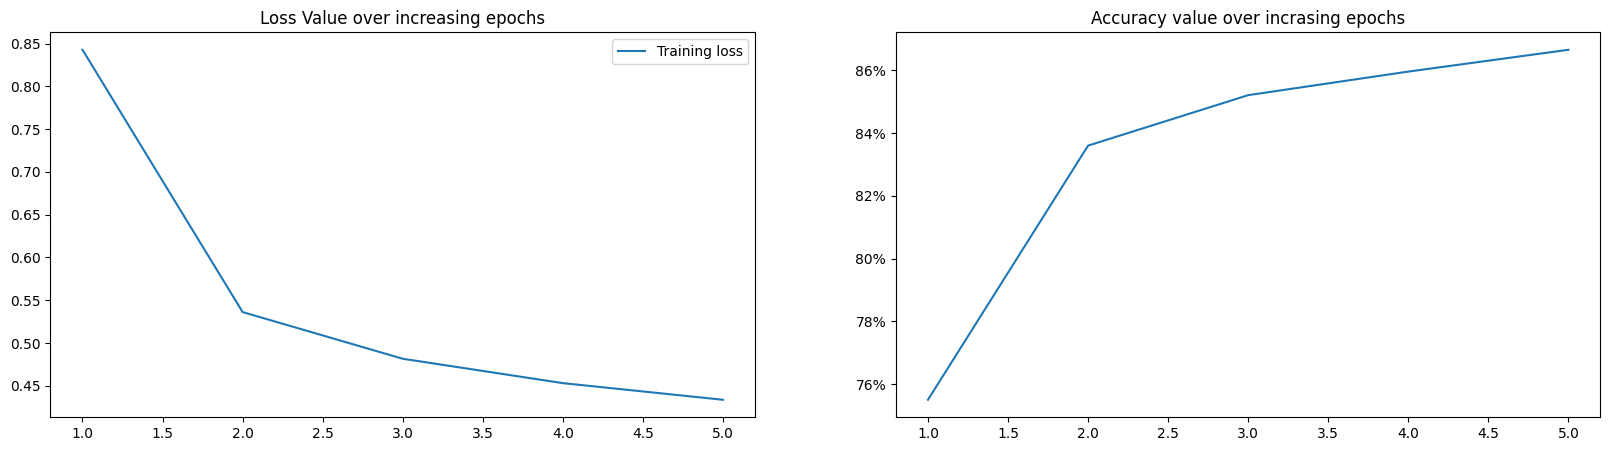

In [58]:
epochs = np.arange(5) + 1
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.title("Loss Value over increasing epochs")
plt.plot(epochs, losses, label='Training loss')
plt.legend()
plt.subplot(122)
plt.title("Accuracy value over incrasing epochs")
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])

- Training accuracy has consistently reduced and trainign accuracy consistently increased thus increasing the epochs to an accuracy of 85%
- why does scaling help?
- Consider the sigmoid function

$\sigma(z) = \frac{1}{1+e^{-Input * weight}}$

In [62]:
def sigmoid(input, weight):
    return 1.0 / (1.0 + np.exp(-(input * weight)))

In [67]:
import pandas as pd
input = [255 for _ in range(14)]
weight = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
sig = [sigmoid(x, y) for x, y in zip(input, weight)]
df = pd.DataFrame(np.column_stack([input, weight, sig]), columns=['input', 'weight', 'sig'])

input_ = [1 for _ in range(14)]
sig = [sigmoid(x, y) for x, y in zip(input_, weight)]
df2 = pd.DataFrame(np.column_stack([input_, weight, sig]), columns=['input', 'weight', 'sig'])

In [66]:
df

,input,weight,sig
0,255.0,0.00001,0.500637
1,255.0,0.00010,0.506375
2,255.0,0.00100,0.563407
3,255.0,0.01000,0.927574
4,255.0,0.10000,1.000000
5,255.0,0.20000,1.000000
6,255.0,0.30000,1.000000
7,255.0,0.40000,1.000000
8,255.0,0.50000,1.000000
9,255.0,0.60000,1.000000


In [68]:
df2

,input,weight,sig
0,1.0,0.00001,0.500002
1,1.0,0.00010,0.500025
2,1.0,0.00100,0.500250
3,1.0,0.01000,0.502500
4,1.0,0.10000,0.524979
5,1.0,0.20000,0.549834
6,1.0,0.30000,0.574443
7,1.0,0.40000,0.598688
8,1.0,0.50000,0.622459
9,1.0,0.60000,0.645656


### Observation
- we can see for the case when there is no scaling, i.e 255 pixel value, sigmoid doesn't vary much after 0.1 with increasing weight value.  Sigmoid value changed only by a little when the weight was extremely small; only way to vary sigmoid value is by having the weight change to a very very small amount
- but on the 2nd dataframe, where there is scaling, sigmoid value varies (mainly due to smallest input value).  In the original sigmoid, having high 255 values means sigmoid is large positive and converges to 1.  
- scaling input dataset so that it contains a smaller range of values helps in achieving better model accuracy

## Understanding impact of Varying Batch Size
- before, 32 data points were considered per batch in the training dataset.  This resulted in greater number of weight updates per epoch as there were 60000 / 32 = 1875 weight updates.  
- we did not consider model's performance on unseen data (validation dataset)
- lets look at loss and accuracy values on training and validation data when batch size is 32 and when batch size is 10000

## Batch size of 32

In [74]:
fmnist = datasets.FashionMNIST(path, download=True, train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets

fmnist = datasets.FashionMNIST(path, download=True, train=False)
val_images = fmnist.data
val_targets = fmnist.targets

class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/255.
        x = x.view(-1, 28*28)
        self.x, self.y = x.float(), y.float()
    def __getitem__(self, ix):
        return self.x[ix].to('mps'), self.y[ix].to("mps")
    
    def __len__(self):
        return len(self.x)

learning_rate = 1e-2
def get_model(learning_rate):
    model = nn.Sequential(
        nn.Linear(28*28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to("mps")
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    return model, loss_fn, optimizer

def train_batch(x, y, model, opt, loss_fn):
    model.train()
    pred = model(x)
    batch_loss = loss_fn(pred, y)
    # based on forward pass in model(x).  It computes the gradients of the loss wrt to all the parameters in the model
    batch_loss.backward()
    opt.step()
    opt.zero_grad()
    return batch_loss.item()

@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    pred = model(x)
    max_values, arg_max = pred.max(-1)
    is_correct = arg_max == y
    return is_correct.cpu().numpy().tolist()


def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
    return trn_dl, val_dl

@torch.no_grad
def val_loss(x, y, model, loss_fn):
    model.eval()
    pred = model(x)
    val_loss = loss_fn(pred, y)
    return val_loss.item()

- note that for val_dl, we are using batch_size of len(val_images), teh whole val images set.  We are not using 32 here because training data is used to train the model while we are fetching accuracy and loss metrics of validation data.  We need to understand the impact of varying batch_size based on models' training time and accuracy

In [75]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model(learning_rate=learning_rate)

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model, loss_fn)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


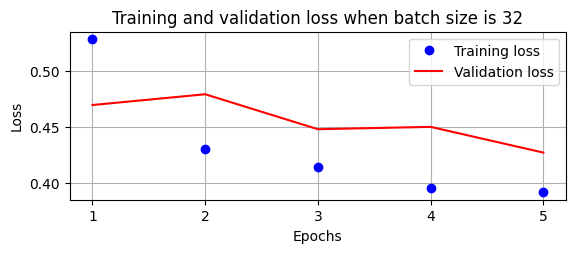

/var/folders/8q/h_918phj53q6hkl0scwf5fmr0000gn/T/ipykernel_8105/415909842.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


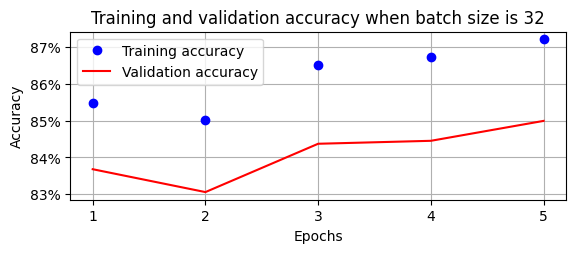

In [76]:

epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy when batch size is 32')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

- As one can see, training and validation accuracy is ~85% by end of 5 epochs when batch is 32
## Batch size of 10000


In [77]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=10000, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
    return trn_dl, val_dl

In [78]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model(learning_rate=learning_rate)

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model, loss_fn)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


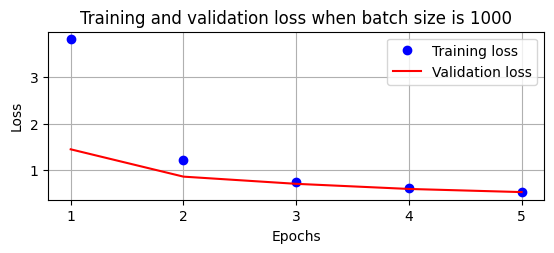

/var/folders/8q/h_918phj53q6hkl0scwf5fmr0000gn/T/ipykernel_8105/88092317.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


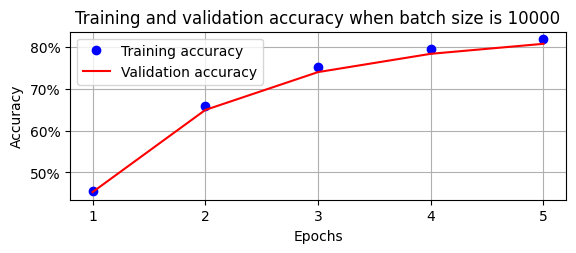

In [79]:

epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 1000')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy when batch size is 10000')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

- Accuracy and loss values did not reach the same levels as when the batch size is 32 since theres fewer weight updates.  Using a batch size of 10000, there are 6 weight updates per epoch since there are 10000 datapoints per batch.  

## Understanding the impact of varying the loss Optimizer
- We have been using Adam optimizer.  Now lets do the following:
    - modify optimizer so that it becomes a SGD optimizer
    - revert to batch size of 32 while ftching data in DataLoader
    - increase number of epochs to 10 so that we can compare the performance of SGD and Adam over longer number of epochs

In [80]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
    return trn_dl, val_dl

def get_model(learning_rate):
    model = nn.Sequential(
        nn.Linear(28*28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to("mps")
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    return model, loss_fn, optimizer

trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model(learning_rate=learning_rate)

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(10):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model, loss_fn)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4
5
6
7
8
9


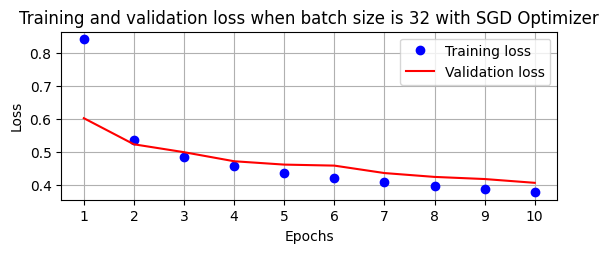

/var/folders/8q/h_918phj53q6hkl0scwf5fmr0000gn/T/ipykernel_8105/1301153106.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


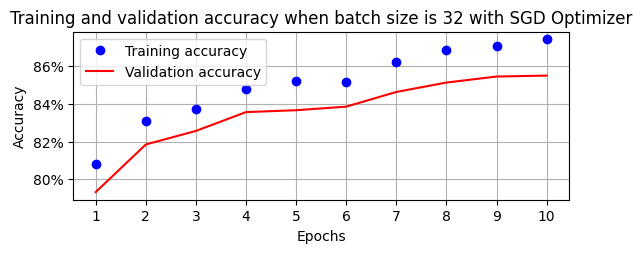

In [82]:

epochs = np.arange(10)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32 with SGD Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy when batch size is 32 with SGD Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In [83]:
def get_model(learning_rate):
    model = nn.Sequential(
        nn.Linear(28*28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to("mps")
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    return model, loss_fn, optimizer

trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model(learning_rate=learning_rate)

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(10):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model, loss_fn)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4
5
6
7
8
9


In [ ]:

epochs = np.arange(10)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32 with Adam Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy when batch size is 32 with Adam Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

## Impact of learning rate on scaled data
- High learning rate
- Medium Learning rate
- Low learning rate

0
1
2
3
4
5
6
7
8
9


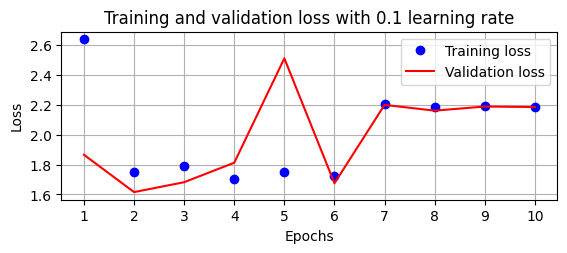

/var/folders/8q/h_918phj53q6hkl0scwf5fmr0000gn/T/ipykernel_8105/2782320816.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


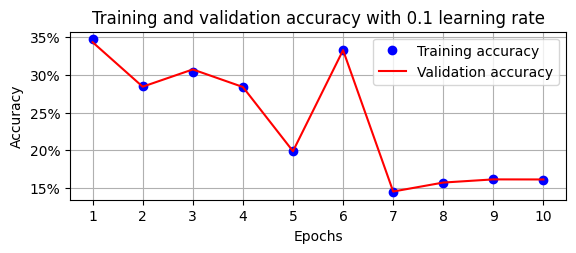

In [85]:
# high learning rate
learning_rate = 0.1
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model(learning_rate=learning_rate)

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(10):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model, loss_fn)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with 0.1 learning rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with 0.1 learning rate')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

- when the learning rate is high, accuracy of validation set and training set is low (model is underfitting).  

In [104]:
# medium learning rate
learning_rate = 0.001
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model(learning_rate=learning_rate)

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(10):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model, loss_fn)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)


0
1
2
3
4
5
6
7
8
9


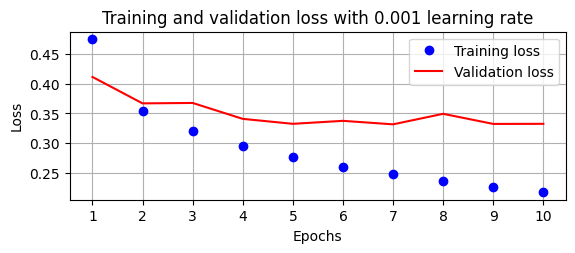

/var/folders/8q/h_918phj53q6hkl0scwf5fmr0000gn/T/ipykernel_8105/684685879.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


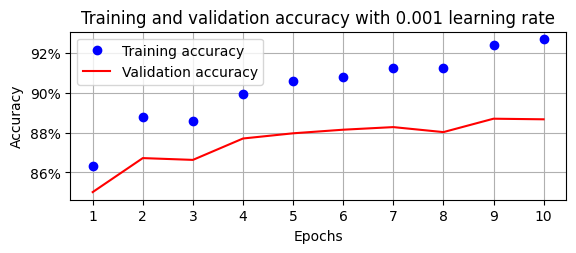

In [102]:

plt.subplot(211)

epochs = np.arange(10)+1
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with 0.001 learning rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with 0.001 learning rate')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()


- medium learning rate reaches 88% accuracy within 6 epochs, yet there is clear overfitting since training accuracy is much higher than validation accuracy and training loss is much lower than validation loss.  
- If we decrease the learning rate to 0.0001, we will see that hte model learned far slower compared to medium learning rate.  It will take 100 epochs to reach 89% accuracy compard to 8 epochs when learning rate is 0.001.  
- gap between training and validation is much lower when the learning rate is low compared to previous scenario since weight update is much smaller when the learning rate is low which means that the gap between training and validation loss does not widen quickly.  

## Parameter distribution across layers for different learning rates
- with a high learning rate (0.1) model is unable to be trained (model is underfitted).  We can train model to get good accuraycy when learning rate is 0.001 or 0.00001.  Medium learning rate overfits quickly while low learning rate took a longer time to achieve an accuracy comparable to that of medium learning rate model
- parameter distribution can be a good way to see if there is a model overfit or underfit

Text(0.5, 1.0, 'distribution of weights connecting input to hidden layer')

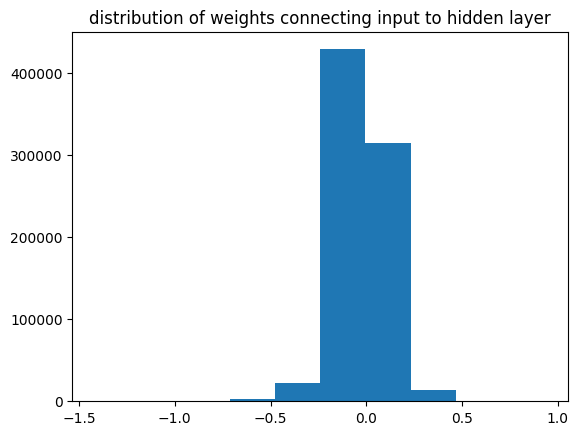

In [97]:
check = {ix: par.cpu().detach().numpy().flatten() for ix, par in enumerate(model.parameters())}
plt.hist(check[0])
plt.title("distribution of weights connecting input to hidden layer")

Text(0.5, 1.0, 'distribution of weights connecting input to hidden layer')

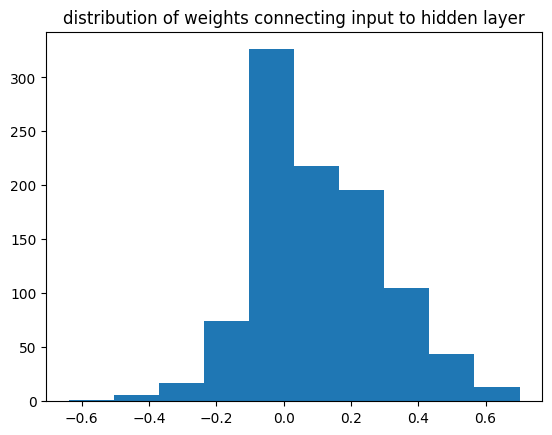

In [98]:
plt.hist(check[1])
plt.title("distribution of biases in hidden layer")

Text(0.5, 1.0, 'distribution of weights connecting hidden to output layer')

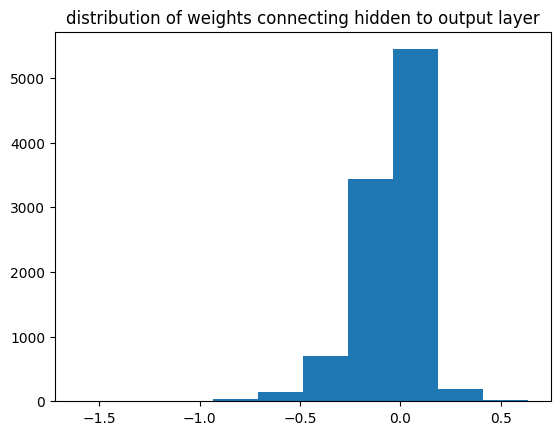

In [100]:
plt.hist(check[2])
plt.title("distribution of weights connecting hidden to output layer")

Text(0.5, 1.0, 'distribution of biases of output layer')

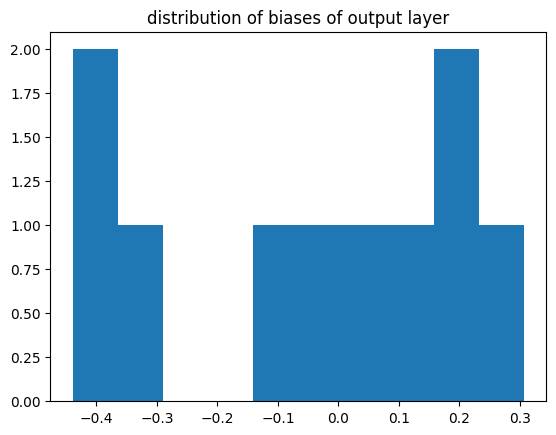

In [101]:
plt.hist(check[3])
plt.title("distribution of biases of output layer")

- when the learning rate is high (0.1) not shown in parameter distribution, parameteters have much larger range than when learning rate is low (look at the x axis).  So when learning rate is high (0.1), this leads to underfitting.  
- when parameters have larger distribution, overfitting occurs

## Learning rate annealing
- learning rate has been constant  and remained same across all epochs while training the model.  It would be good for weights to be updated quickly (large learning rate) and then should be updated slowly on further epochs since amount of loss that gets reduced initially is high and the amount ofloss that gets reduced in later epochs would be low.  
- so start with high learning rate and gradually lower it later as the model achieves near optimial accuracy.  When should we reduce it? 
- continually monitor the validation loss and if validation loss does not decrease over the previous x epochs, then reduce learning rate
- pytorch provides tools to perform learning rate reduction when the validation loss does not decrease in previous x epochs.  Use the __lr_scheduler__ method
- in below code, we reduce leaerning rate paramter of optimizer by factor of 0.5 if certain value does not improve over next n epochs, n=0 in this case, by a threshold which is 0.001.  min_lr is the lowest learning rate we can accept adn threshold_mode is absolute to ensure minimum threshold of 0.001 is crossed

In [123]:
torch.set_default_device("mps")

def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True, generator=torch.Generator(device='mps'))
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False, generator=torch.Generator(device='mps'))
    return trn_dl, val_dl

def get_model(learning_rate):
    model = nn.Sequential(
        nn.Linear(28*28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to("mps")
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    return model, loss_fn, optimizer
learning_rate = 0.1
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model(learning_rate=learning_rate)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                                       factor=0.5, patience=0,
                                                       threshold=0.001,
                                                       verbose=True,
                                                       min_lr=1e-5,
                                                       threshold_mode='abs')

In [124]:


train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(20):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model, loss_fn)
        scheduler.step(validation_loss)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


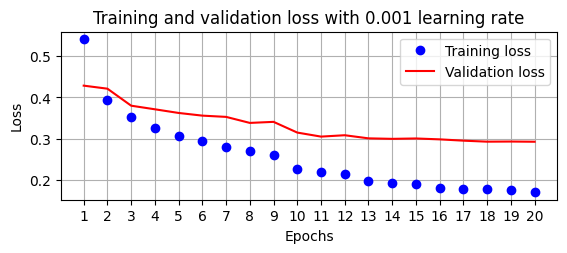

/var/folders/8q/h_918phj53q6hkl0scwf5fmr0000gn/T/ipykernel_8105/3710039039.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


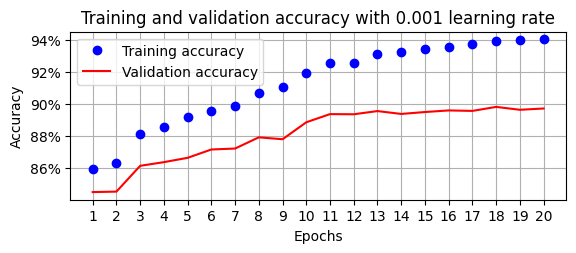

In [126]:

plt.subplot(211)

epochs = np.arange(20)+1
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with 0.001 learning rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with 0.001 learning rate')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

- using learning rate annhealing does not cause huge overfitting issues even by increasing epochs (book is showing 100 epochs, crazy).  This is because learning rate became so small that weight update was very small, resulting in smaller gap between training and validation accuracies.  
- so far, we see that scaling the data, size of the batch, learning rate are ways we can affect model accuracy and loss.  NOw we will see how number of layers affects its accuracy

## Building a deeper NN
- assume two hidden layers for now and we will later use no hidden layer (logistic regression)


In [128]:
def get_model(learning_rate):
    model = nn.Sequential(
        nn.Linear(28*28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to("mps")
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    return model, loss_fn, optimizer

def get_model_no_hidden(learning_rate):
    model = nn.Sequential(
        nn.Linear(28*28, 10),
    ).to("mps")
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    return model, loss_fn, optimizer

In [129]:
learning_rate = 0.01
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model(learning_rate=learning_rate)



train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(10):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model, loss_fn)
        scheduler.step(validation_loss)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)


0
1
2
3
4
5
6
7
8
9


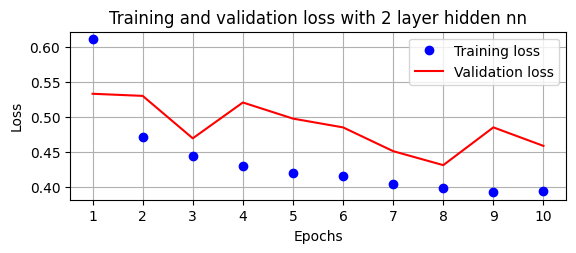

/var/folders/8q/h_918phj53q6hkl0scwf5fmr0000gn/T/ipykernel_8105/2046677242.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


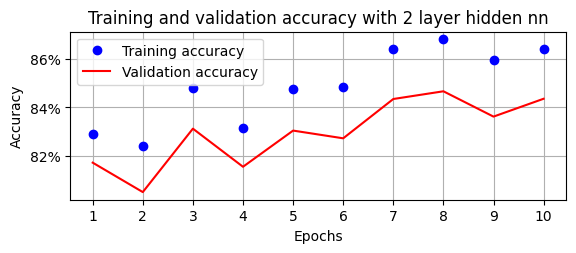

In [130]:

plt.subplot(211)

epochs = np.arange(10)+1
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with 2 layer hidden nn')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with 2 layer hidden nn')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

- model is unable to learn as well when there are no hidden layers
- model is overfit by a larger amount when there are two hidden layers compared to one hidden layer (validation loss is higher in the model with two layers compareds to the model with one layer).  Cant view this in above graph, have to increase the number of epochs to 30 then one can see it.  see the book

## Batch Normalizationl
- when input value is large, sigmoid doesn;t vary much (close to 1).  What happens if the input is very small? If the input is very small, varying weights doesn't impact the sigmoid function as well

In [135]:
input_ = [0.01 for _ in range(14)]
sig = [sigmoid(x, y) for x, y in zip(input_, weight)]
df3 = pd.DataFrame(np.column_stack([input_, weight, sig]), columns=['input', 'weight', 'sig'])

In [136]:
df3

,input,weight,sig
0,0.01,0.00001,0.500000
1,0.01,0.00010,0.500000
2,0.01,0.00100,0.500002
3,0.01,0.01000,0.500025
4,0.01,0.10000,0.500250
5,0.01,0.20000,0.500500
6,0.01,0.30000,0.500750
7,0.01,0.40000,0.501000
8,0.01,0.50000,0.501250
9,0.01,0.60000,0.501500


- We cant neither have large input values or very small input values. But what if our input values are between 0 and 1, we could still encounter issue where in the hidden layer, the input vlaues become very small
- Batch Normalization comes to rescue for these types of scenario where it normalizes values in each node.
- All input values are scaled as follows:

Batch Mean $\mu_B = \frac{1}{m}\sum_{i=1}^m x^i$

Batch Variance $\sigma_B^2 = \frac{1}{m}\sum_{i=1}^m (x^i - \mu_B)^2$

Normalized Input $x_i = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}$

Batch normalized input: $\gamma x_i + \beta$

- We need to identify the parameters $\gamma$ and $\beta$